Importing Dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing


In [2]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

In [13]:
correlation = gold_data.drop('Date',axis=1).corr()

<Axes: >

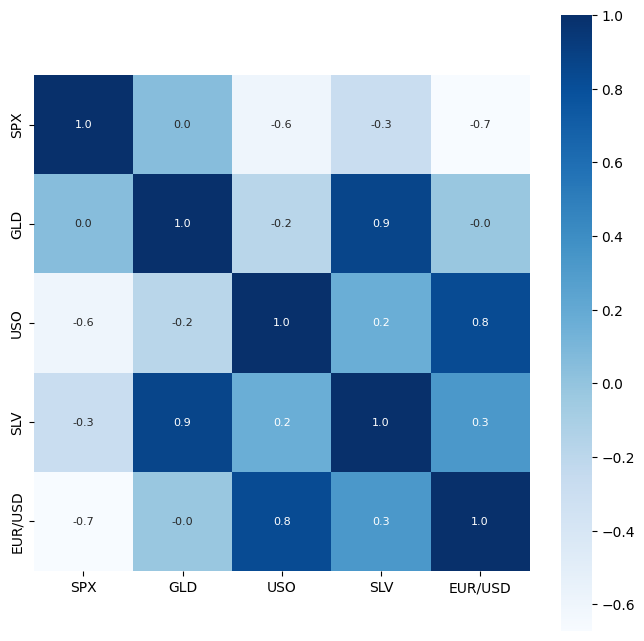

In [14]:
#constructing a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')


In [15]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-16-1544075935.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

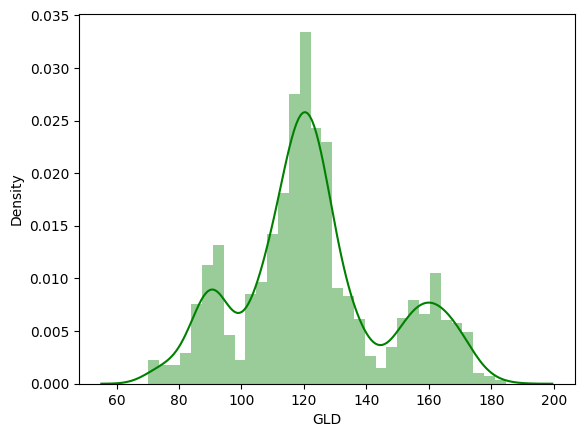

In [16]:
# check the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [17]:
X = gold_data.drop(['GLD','Date'],axis=1)
Y = gold_data['GLD']

In [18]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into traing and test data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

Random Forest Regressor

In [20]:
regressor = RandomForestRegressor(n_estimators=100)

In [21]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [22]:
test_data_prediction = regressor.predict(X_test)

In [23]:
print(test_data_prediction)

[168.42649908  82.10029994 116.12379991 127.61610074 120.75950125
 154.91139798 150.20579918 126.18470014 117.42969898 125.81930129
 116.51210116 171.96120087 141.85729845 167.64159904 115.2228998
 117.70460067 139.8385029  170.03040105 159.1808018  157.26749927
 155.08310001 125.20539987 176.00499947 156.87690311 125.20750047
  93.84759985  78.06300018 120.3970002  119.13959946 167.48929981
  88.02300034 125.33350028  91.19660116 117.66220007 121.1462994
 136.58030131 115.42670119 115.25690059 146.77279932 106.92810099
 104.38780245  87.19759788 126.52900058 118.01559986 152.33629934
 119.75319967 108.36060001 107.85019821  93.11950073 127.13349759
  75.43870018 113.65879947 121.31060057 111.25959926 118.85589892
 120.50719928 159.83630057 167.23450061 146.86149688  85.80709825
  94.58510041  86.80549894  90.45710013 118.90610061 126.47610057
 127.47889965 170.44780005 122.22079943 117.20219902  98.49569991
 168.18920183 142.85149845 131.9226028  121.25960204 120.97719915
 119.6665006

In [24]:
#r square error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R square error : ",error_score)

R square error :  0.988811678143034


Compare the actual value and the predicted value

In [25]:
Y_test = list(Y_test)

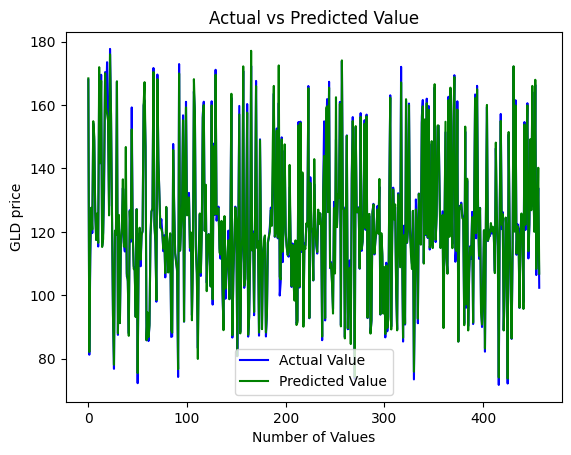

In [27]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.xlabel('Number of Values')
plt.ylabel('GLD price')
plt.title('Actual vs Predicted Value')
plt.legend()
plt.show()